# Question 0: Predicting Salary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
import time
timestamp = str(time.time())

In [2]:
# read file

data_file = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
print (data_file.shape)
# salary

(10000, 12)


## Preprocessing

In [3]:
salary = data_file

# dropped columns that are not useful
salary = salary.drop(['LocationRaw', 'SalaryRaw', 'SourceName'], axis=1)

# made all words lower
salary['Title'] = salary['Title'].str.lower()
salary['FullDescription'] = salary['FullDescription'].str.lower()
salary['LocationNormalized'] = salary['LocationNormalized'].str.lower()
salary['ContractType'] = salary['ContractType'].str.lower()
salary['ContractTime'] = salary['ContractTime'].str.lower()
salary['Company'] = salary['Company'].str.lower()
salary['Category'] = salary['Category'].str.lower()

# removed leading or trailing white space
salary['Title'] = salary['Title'].str.strip()
salary['FullDescription'] = salary['FullDescription'].str.strip()
salary['LocationNormalized'] = salary['LocationNormalized'].str.strip()
salary['ContractType'] = salary['ContractType'].str.strip()
salary['ContractTime'] = salary['ContractTime'].str.strip()
salary['Company'] = salary['Company'].str.strip()
salary['Category'] = salary['Category'].str.strip()

In [4]:
# replaced missing data with dummy entries
salary['Title'].fillna(value = 'Title_Missing', inplace=True)
salary['ContractType'].fillna(value = 'ContractType_Missing', inplace=True)
salary['ContractTime'].fillna(value = 'ContractTime_Missing', inplace=True)
salary['Company'].fillna(value = 'Company_Missing', inplace=True)

In [5]:
# vectorized categorical features using one hot encoding
salary = pd.get_dummies(salary, columns=['LocationNormalized', 'ContractTime', 'ContractType', 'Category'])

In [6]:
# vectorized non-categorical string features using TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_features=10000)
# dropped full description and added vectorized description
salary = pd.concat([salary, pd.DataFrame(vect.fit_transform(salary.Title).toarray(), columns=vect.get_feature_names()), pd.DataFrame(vect.fit_transform(salary.FullDescription).toarray(), columns=vect.get_feature_names()), pd.DataFrame(vect.fit_transform(salary.Company).toarray(), columns=vect.get_feature_names())],axis=1)
salary = salary.drop(['Title', 'FullDescription', 'Company'],axis=1)

In [7]:
print (salary.shape)

(10000, 16050)


## Split Dataset Into Training and Testing

In [8]:
from sklearn.model_selection import train_test_split
X = salary.drop('SalaryNormalized', axis=1)
Y= salary.SalaryNormalized
from sklearn.decomposition import PCA
pca = PCA(n_components=1000)
pca.fit(X)
X = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
train_scores = {}
test_scores = {}

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
train_scores['linear'] = lr.score(X_train, y_train)
test_scores['linear'] = lr.score(X_test, y_test)
print('Linear regression training set score: ', train_scores['linear'])
print('Linear regression testing set score: ', test_scores['linear'])

Linear regression training set score:  0.6987953031553861
Linear regression testing set score:  0.6097625443358663


## Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
train_scores['ridge'] = ridge.score(X_train, y_train)
test_scores['ridge'] = ridge.score(X_test, y_test)
print('Ridge Regression training set score: ', train_scores['ridge'])
print('Ridge Regression testing set score: ', test_scores['ridge'])

Ridge Regression training set score:  0.6964045589872981
Ridge Regression testing set score:  0.6200794055218732


C:\Users\Adhar Pratap Singh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.614735e-18
  overwrite_a=True).T


## Lassso

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
train_scores['lasso'] = lasso.score(X_train, y_train)
test_scores['lasso'] = lasso.score(X_test, y_test)
print('Lasso training set score: ', train_scores['lasso'])
print('Lasso testing set score: ', test_scores['lasso'])

Lasso training set score:  0.6957570208702897
Lasso testing set score:  0.617832028474667


## Decision Trees

In [12]:
from sklearn.tree import DecisionTreeRegressor

for n in range(3,8):
    tree = DecisionTreeRegressor(max_depth=n).fit(X_train, y_train)
    train_scores['tree' + str(n)] = tree.score(X_train, y_train)
    test_scores['tree' + str(n)] = tree.score(X_test, y_test)
    print('Decision Tree of depth ', n, ' training set score: ', train_scores['tree' + str(n)])
    print('Decision Tree of depth ', n, ' testing set score: ', test_scores['tree' + str(n)])

Decision Tree of depth  3  training set score:  0.2215379388182801
Decision Tree of depth  3  testing set score:  0.21474986420862482
Decision Tree of depth  4  training set score:  0.2699310581356297
Decision Tree of depth  4  testing set score:  0.23055917986445873
Decision Tree of depth  5  training set score:  0.3266258665877735
Decision Tree of depth  5  testing set score:  0.26897735083994967
Decision Tree of depth  6  training set score:  0.3878539515480266
Decision Tree of depth  6  testing set score:  0.29146648914624473
Decision Tree of depth  7  training set score:  0.46061607583718045
Decision Tree of depth  7  testing set score:  0.30245679319809904


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

for n in range(2,8):
    forest = RandomForestClassifier(n_estimators=n, random_state=2).fit(X_train, y_train)
    train_scores['forest' + str(n)] = forest.score(X_train, y_train)
    test_scores['forest' + str(n)] = forest.score(X_test, y_test)
    print('Random Forest with ', n, ' estimators training set score: ', train_scores['forest' + str(n)])
    print('Random Forest with ', n, ' estimators testing set score: ', test_scores['forest' + str(n)])

Random Forest with  2  estimators training set score:  0.6462857142857142
Random Forest with  2  estimators testing set score:  0.06566666666666666
Random Forest with  3  estimators training set score:  0.7921428571428571
Random Forest with  3  estimators testing set score:  0.07
Random Forest with  4  estimators training set score:  0.8928571428571429
Random Forest with  4  estimators testing set score:  0.074
Random Forest with  5  estimators training set score:  0.9457142857142857
Random Forest with  5  estimators testing set score:  0.08566666666666667
Random Forest with  6  estimators training set score:  0.972
Random Forest with  6  estimators testing set score:  0.09166666666666666
Random Forest with  7  estimators training set score:  0.9864285714285714
Random Forest with  7  estimators testing set score:  0.09966666666666667


## Analysis

Here is a histogram with all scores for training and testing.

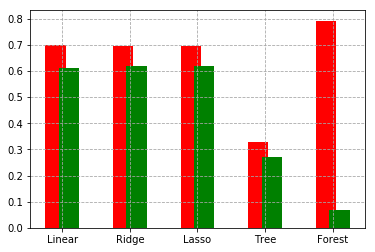

In [14]:
x = [1,2,3,4,5]
tr_scores = []
te_scores = []
for n in ['linear','ridge','lasso','tree5','forest3']:
    tr_scores.append(train_scores[n])
    te_scores.append(test_scores[n])

ax = plt.subplot(111)
ax.bar([n-0.1 for n in x], tr_scores,width=0.3,color='r',align='center')
ax.bar([n+0.1 for n in x], te_scores,width=0.3,color='g',align='center')
ax.set_xticklabels(['', 'Linear', 'Ridge', 'Lasso', 'Tree', 'Forest'])
plt.grid(b=True, which='major', color='0.65', linestyle='--')
plt.show()